In [118]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


In [119]:
df_2018 = pd.read_csv(
    Path("abril2018.csv")
)
df_2018.head()

C:\Users\sumai\AppData\Local\Temp\ipykernel_21980\139607424.py:1: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv(


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.38
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,f,NaN,NaN,t,f,strict,f,f,1,2.17
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,f,NaN,NaN,f,f,strict,f,f,1,0.92
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,NaN,NaN,f,f,strict,t,t,3,2.17
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,f,NaN,NaN,t,f,strict,f,f,1,2.12


In [120]:
print("Column Names:")
for column in df_2018.columns:
    print(column)

Column Names:
id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availa

In [121]:
import folium
rio_data_subset_april_2018 = df_2018.head(100)
rio_center = [-22.9068, -43.1729]

# map centered at Rio de Janeiro
mymap = folium.Map(location=rio_center, zoom_start=10)

for index, row in rio_data_subset_april_2018.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    
    folium.Marker([lat, lon]).add_to(mymap)
mymap


In [122]:
selected_data = df_2018.head(100)[['price', 'weekly_price', 'monthly_price']]
selected_data.head(50)

,price,weekly_price,monthly_price
0,$133.00,$823.00,"$2,698.00"
1,$270.00,NaN,NaN
2,$222.00,NaN,NaN
3,$161.00,NaN,NaN
4,$222.00,NaN,NaN
5,$308.00,NaN,"$7,876.00"
6,$219.00,"$1,500.00",NaN
7,$150.00,$600.00,"$2,000.00"
8,$120.00,"$1,912.00","$6,113.00"
9,"$3,241.00",NaN,NaN


In [124]:
name_valuecounts = df_2018['neighbourhood'].value_counts()
name_valuecounts

Copacabana                  9774
Barra da Tijuca             6882
Ipanema                     3400
Recreio dos Bandeirantes    2272
Botafogo                    1945
                            ... 
Complexo da Maré               1
Vista Alegre                   1
Manguinhos                     1
Grumari                        1
Honório Gurgel                 1
Name: neighbourhood, Length: 101, dtype: int64

In [126]:
df_all = pd.read_csv(
    Path("total_data_cleaned.csv"))
df_all.head()

C:\Users\sumai\AppData\Local\Temp\ipykernel_21980\721994516.py:1: DtypeWarning: Columns (0,3,14,17,20,42,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,number_of_reviews,first_review,last_review,cancellation_policy
0,76658,https://www.airbnb.com/rooms/76658,2.018082e+13,43328,Luxury Villa Corcovado Room,The Villa is one of the only B&B in all of Ri...,This Superior Room is a breezy corner room wit...,The Villa is one of the only B&B in all of Ri...,"Santa Teresa, or just Santa, as it’s affection...",Santa Teresa is built on a hill and The Villa ...,...,0,2,10,today,t,43328.0,0.0,NaN,NaN,strict_14_with_grace_period
1,103479,https://www.airbnb.com/rooms/103479,2.018082e+13,43328,1Suite + 1quarto 70m2 a 60m da praia Copacabana,Meu apartamento é tranquilo e bem confortável ...,2 bedroons with 15m2 1 bed in each room . 1 S...,Meu apartamento é tranquilo e bem confortável ...,"Perto da praia de copacabana, area segura, ru...","Não aceitamos em hipotese nenhuma, animais!",...,80,3,1125,6 months ago,t,43328.0,5.0,41998.0,42743.0,strict_14_with_grace_period
2,136297,https://www.airbnb.com/rooms/136297,2.018082e+13,43328,"Minimalista e único, com uma vista deslumbrante","Aluguel de apartamento no coração da Lapa, o b...","O apartamento está no 11º andar, o que faz com...","Aluguel de apartamento no coração da Lapa, o b...",Agito todos os dias / noites. Fácil acesso par...,NaN,...,50,2,365,today,t,43328.0,227.0,40827.0,43311.0,strict_14_with_grace_period
3,180504,https://www.airbnb.com/rooms/180504,2.018082e+13,43328,Fabulous Apt 300m² Av. Atlantica,Best spot on Copacabana Beach.,"Wonderful Apartment Eighth Floor, 300 m², Pres...",Best spot on Copacabana Beach. Wonderful Apart...,NaN,NaN,...,194,3,365,8 months ago,t,43328.0,17.0,41211.0,42601.0,strict_14_with_grace_period
4,295383,https://www.airbnb.com/rooms/295383,2.018082e+13,43328,Apt overlooking Copacabana beach,NaN,"Sunny apartment, one block on a side of Copaca...","Sunny apartment, one block on a side of Copaca...",NaN,NaN,...,155,3,60,yesterday,t,43328.0,125.0,40921.0,43290.0,strict_14_with_grace_period


In [127]:
print("Column Names:")
for column in df_all.columns:
    print(column)

Column Names:
id
listing_url
scrape_id
last_scraped
name
summary
space
description
neighborhood_overview
notes
transit
access
interaction
house_rules
host_id
host_url
host_name
host_since
host_about
host_response_time
host_response_rate
host_thumbnail_url
host_picture_url
host_verifications
neighbourhood
city
state
zipcode
country_code
country
latitude
longitude
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
calendar_last_scraped
number_of_reviews
first_review
last_review
cancellation_policy


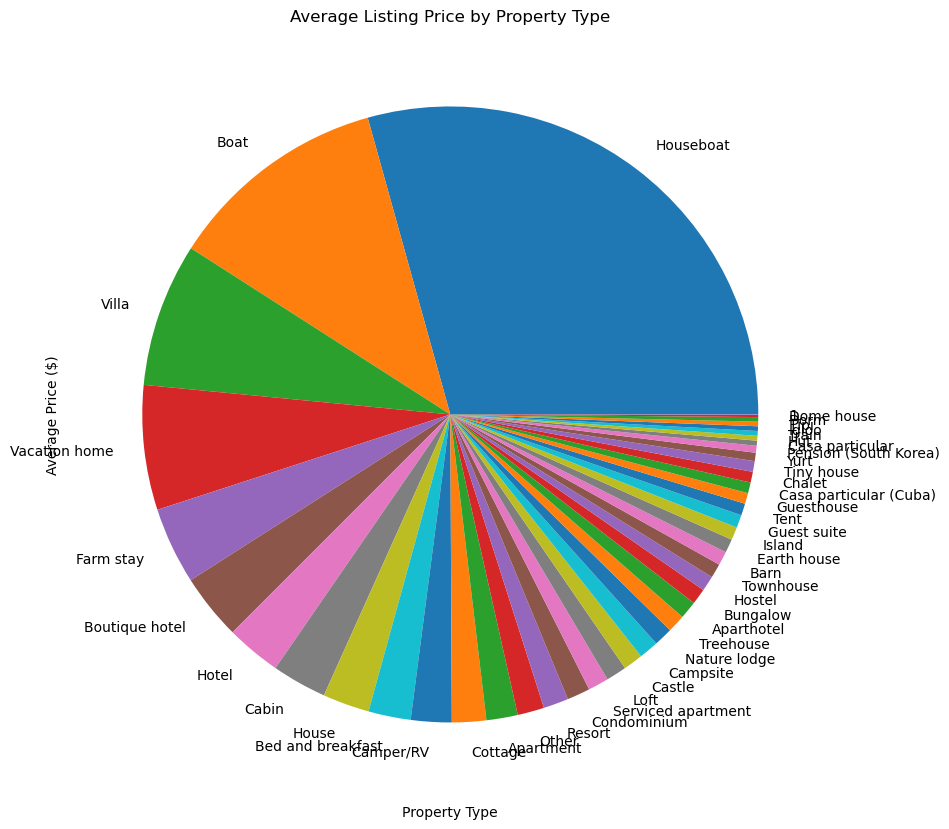

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
df_all.groupby('property_type')['price'].mean().sort_values(ascending=False).plot(kind='pie')
plt.title('Average Listing Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


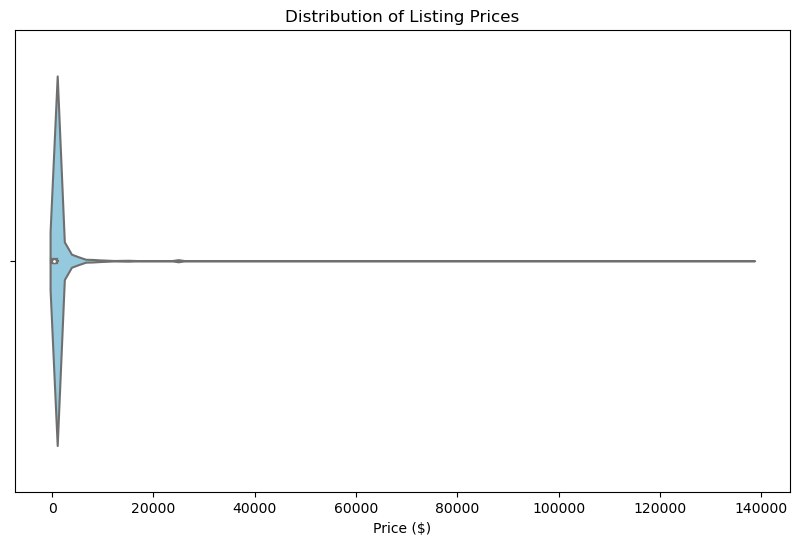

In [129]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_all['price'], color='skyblue')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.show()

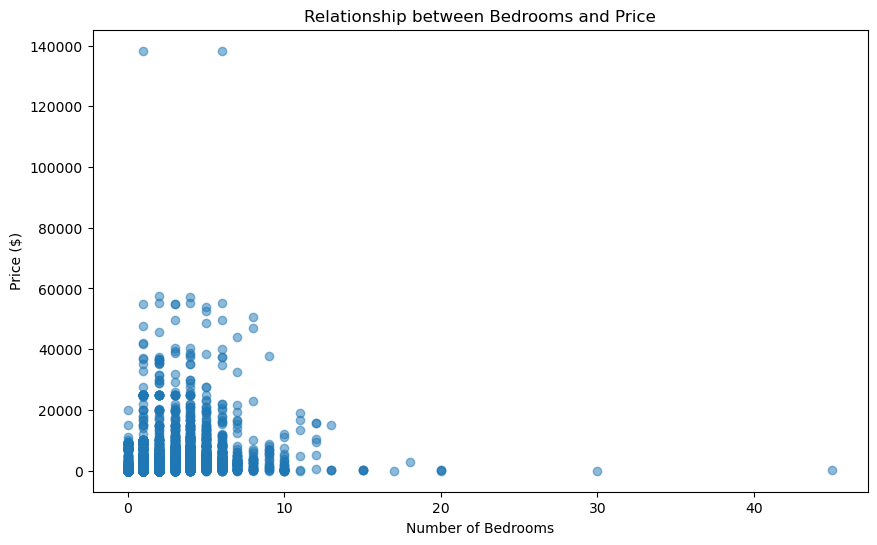

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(df_all['bedrooms'], df_all['price'], alpha=0.5)
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()


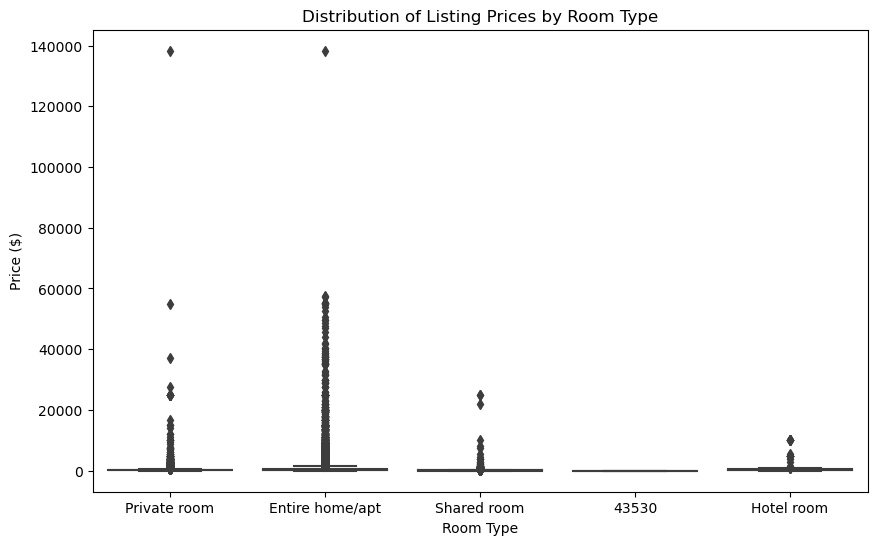

In [131]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_all)
plt.title('Distribution of Listing Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()


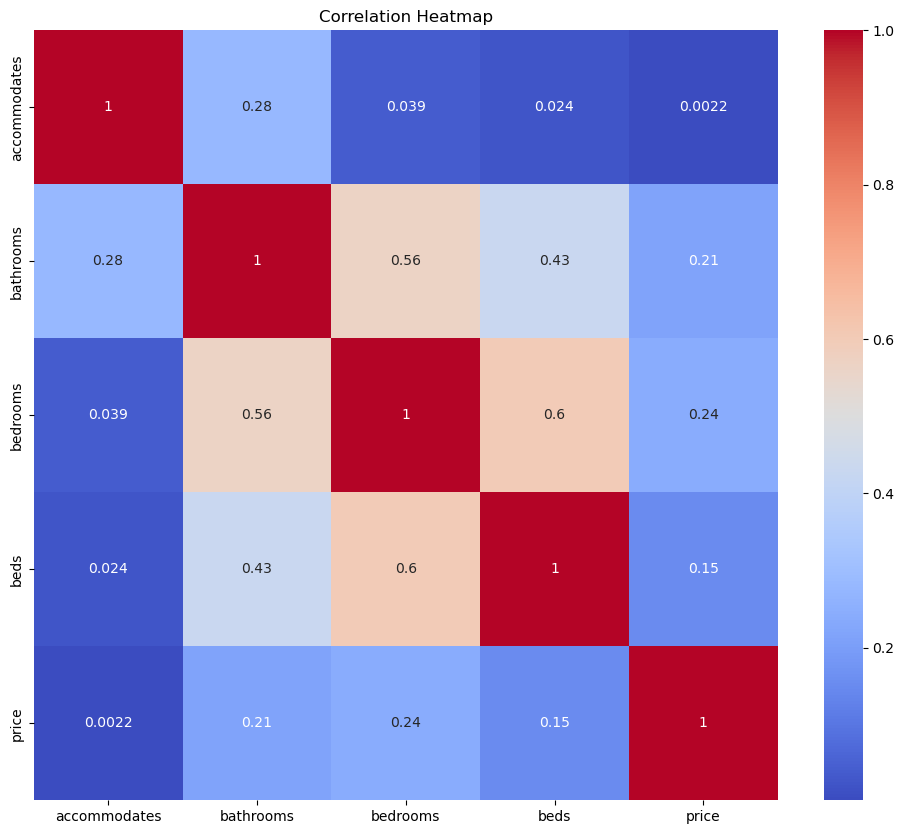

In [132]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_all[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


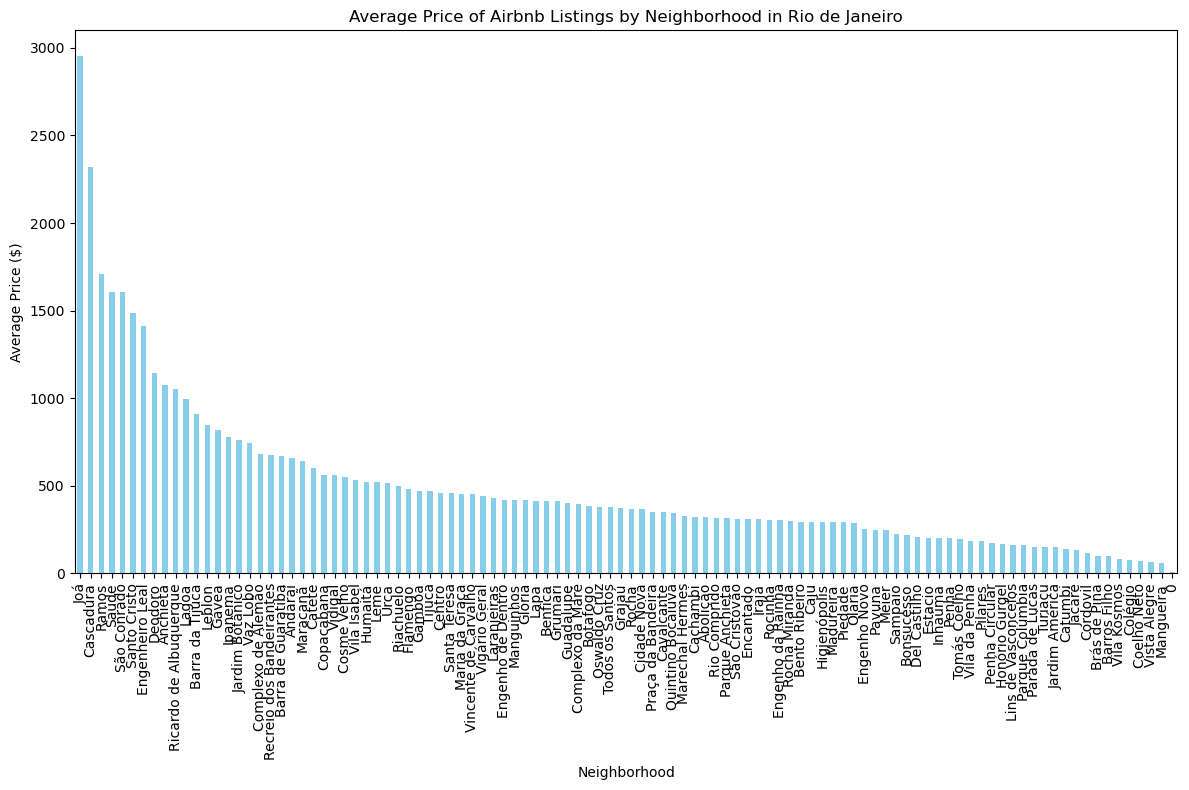

In [133]:
import matplotlib.pyplot as plt
neighborhood_prices = df_all.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# bar chart
plt.figure(figsize=(12, 8))
neighborhood_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price of Airbnb Listings by Neighborhood in Rio de Janeiro')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [134]:
def assign_segment(num_reviews):
    if num_reviews >= 100:
        return 'Highly Reviewed'
    elif num_reviews >= 50:
        return 'Moderately Reviewed'
    else:
        return 'Less Reviewed'
df_all['segment'] = df_all['number_of_reviews'].apply(assign_segment)


In [135]:
df_all['booking_status'] = df_all['number_of_reviews'].apply(lambda x: 1 if x > 0 else 0)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# features and target variable
features = ['accommodates', 'bathrooms', 'bedrooms', 'price']
target = 'booking_status'

X = df_all[features]
y = df_all[target]

imputer = SimpleImputer(strategy='mean') 
X_imputed = imputer.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict booking status for test data
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.6232325282457208
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57      6973
           1       0.63      0.71      0.67      7808

    accuracy                           0.62     14781
   macro avg       0.62      0.62      0.62     14781
weighted avg       0.62      0.62      0.62     14781



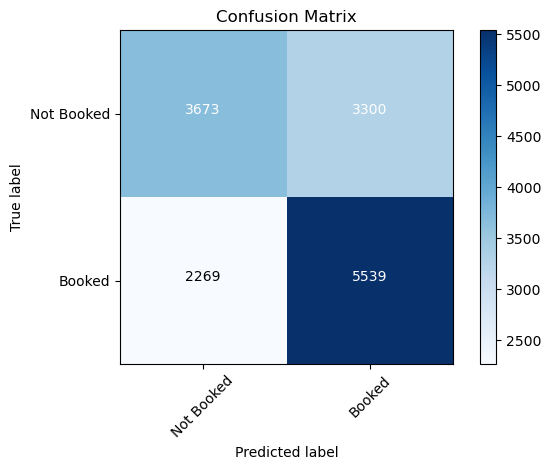

In [148]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, y_pred)

confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Not Booked', 'Booked']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [151]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

X = df_all[features]

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('kmeans', KMeans(n_clusters=5))  # KMeans clustering
])
pipeline.fit(X)

cluster_labels = pipeline.named_steps['kmeans'].labels_

df_all['cluster'] = cluster_labels

print("Cluster distribution:")
print(df_all['cluster'].value_counts())



C:\Users\sumai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster distribution:
4    38450
0    15969
3    13525
2     5958
1        1
Name: cluster, dtype: int64


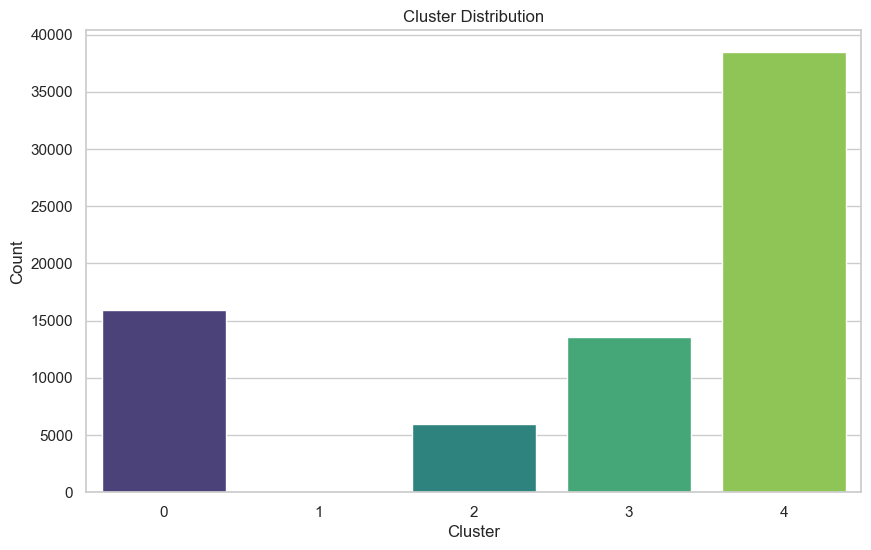

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_all, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
